## EMCPy Unit Test Examples
Below are each unit test results separated into the following groups:\
1.) Test Defaults\
2.) Test Units\
3.) Test Utilities\
4.) Test Plots\
5.) Test Map Plots

### 1.) Test Defaults

In [1]:
import sys
sys.path.append('/scratch1/NCEPDEV/da/Kevin.Dougherty/emcpy/src/')

In [2]:
from emcpy.plots import VariableSpecs


def test_defaults_gdas_variable_specs():
    # read YAML file stored in cfg/
    # print some output
    print('--- Reading Temperature Defaults For Magnitude ---')
    # temperature
    varspecs = VariableSpecs(variable='temperature',
                             eval_type='magnitude')
    print(f'Name:          {varspecs.name}')
    print(f'Short Name:    {varspecs.sname}')
    print(f'Variable Type: {varspecs.type}')
    print(f'Colormap:      {varspecs.cmap}')
    print(f'VMin:          {varspecs.vmin}')
    print(f'VMax:          {varspecs.vmax}')
    
test_defaults_gdas_variable_specs()

--- Reading Temperature Defaults For Magnitude ---
Name:          temperature
Short Name:    t
Variable Type: conventional
Colormap:      rainbow
VMin:          220
VMax:          320


### 2.) Test Units

In [3]:
import emcpy.calcs.units

def test_convert_units_temp():
    # start with celsius
    deg_C = 0
    # test if it converts to fahrenheit properly
    deg_F = emcpy.calcs.units.C_to_F(deg_C)
    assert deg_F == 32.
    # test if it converts to kelvin properly
    kelvin = emcpy.calcs.units.C_to_K(deg_C)
    assert kelvin == 273.15
    # convert F to C
    assert emcpy.calcs.units.F_to_C(deg_F) == deg_C
    # convert K back to C
    assert emcpy.calcs.units.K_to_C(kelvin) == deg_C
    # convert K to F
    assert emcpy.calcs.units.K_to_F(kelvin) == deg_F
    
    print(f'Degrees in Celsius:    {deg_C}')
    print(f'Degrees in Fahrenheit: {deg_F}')
    print(f'Degrees in Kelvin:     {kelvin}')


def test_convert_units_winds():
    # convert m/s to miles per hour
    wind_mps = 10.0
    wind_mph = emcpy.calcs.units.mps_to_MPH(wind_mps)
    
    print(f'Wind speed in mps:  {wind_mps}')
    print(f'Wind Speed in MPH:  {wind_mph}')
    
    assert emcpy.calcs.units.mps_to_MPH(wind_mps) == wind_mph


def test_convert_units_rainfall():
    # convert mm to inches
    rain_mm = 100
    rain_inch = emcpy.calcs.units.mm_to_inches(rain_mm)
    
    print(f'Rainfall in mm:      {rain_mm}')
    print(f'Rainfall in inches:  {rain_inch}')
    
    assert emcpy.calcs.units.mm_to_inches(100) == 3.94

In [4]:
test_convert_units_temp()

Degrees in Celsius:    0
Degrees in Fahrenheit: 32.0
Degrees in Kelvin:     273.15


In [5]:
test_convert_units_winds()

Wind speed in mps:  10.0
Wind Speed in MPH:  22.369


In [6]:
test_convert_units_rainfall()

Rainfall in mm:      100
Rainfall in inches:  3.94


### 3.) Test Utilities

In [7]:
from emcpy.utils import float10Power, roundNumber

float10Power_values = [
    (1.0, -1.),
    (10.1, 1.),
    (100.2, 2.),
    (1000.3, 3.),
    (10000.4, 4.),
]

roundNumber_values = [
    (0.01231, 0.01),
    (0.0164, 0.02),
    (2.3, 2.0),
    (2.8, 3.0),
    (6.2, 6.0),
    (12.8, 10.0),
    (16.8, 20.0),
    (59, 60),
    (141, 100),
    (161, 200),
]


def evaluate_float10Power(index):
    test_value = float10Power_values[index][0]
    result = float10Power(test_value)
    
    print(f'Input value:    {test_value}')
    print(f'10 Power value: {result}')
    
    assert float10Power_values[index][1] == float10Power(
        float10Power_values[index][0])


def test_float10Power_00():
    evaluate_float10Power(0)


def test_float10Power_01():
    evaluate_float10Power(1)


def test_float10Power_02():
    evaluate_float10Power(2)


def test_float10Power_03():
    evaluate_float10Power(3)


def test_float10Power_04():
    evaluate_float10Power(4)


def evaluate_roundNumber(index):
    test_value = roundNumber_values[index][0]
    result = roundNumber(test_value)
    
    print(f'Input value:   {test_value}')
    print(f'Rounded value: {result}')
    
    assert roundNumber_values[index][1] == roundNumber(
        roundNumber_values[index][0])


def test_roundNumber_00():
    evaluate_roundNumber(0)


def test_roundNumber_01():
    evaluate_roundNumber(1)


def test_roundNumber_02():
    evaluate_roundNumber(2)


def test_roundNumber_03():
    evaluate_roundNumber(3)


def test_roundNumber_04():
    evaluate_roundNumber(4)


def test_roundNumber_05():
    evaluate_roundNumber(5)


def test_roundNumber_06():
    evaluate_roundNumber(6)


def test_roundNumber_07():
    evaluate_roundNumber(7)


def test_roundNumber_08():
    evaluate_roundNumber(8)


def test_roundNumber_09():
    evaluate_roundNumber(9)

In [8]:
test_funcs = [test_float10Power_00, test_float10Power_01,
              test_float10Power_02, test_float10Power_03,
              test_float10Power_04]

for func in test_funcs:
    func()
    print()

Input value:    1.0
10 Power value: -1.0

Input value:    10.1
10 Power value: 1.0

Input value:    100.2
10 Power value: 2.0

Input value:    1000.3
10 Power value: 3.0

Input value:    10000.4
10 Power value: 4.0



In [9]:
test_funcs = [test_roundNumber_00, test_roundNumber_01, test_roundNumber_02,
              test_roundNumber_03, test_roundNumber_04, test_roundNumber_05,
              test_roundNumber_06, test_roundNumber_07, test_roundNumber_08,
              test_roundNumber_09]

for func in test_funcs:
    func()
    print()

Input value:   0.01231
Rounded value: 0.01

Input value:   0.0164
Rounded value: 0.02

Input value:   2.3
Rounded value: 2.0

Input value:   2.8
Rounded value: 3.0

Input value:   6.2
Rounded value: 6.0

Input value:   12.8
Rounded value: 10.0

Input value:   16.8
Rounded value: 20.0

Input value:   59
Rounded value: 60.0

Input value:   141
Rounded value: 100.0

Input value:   161
Rounded value: 200.0



### 4.) Test Plots 

#### Line Plots

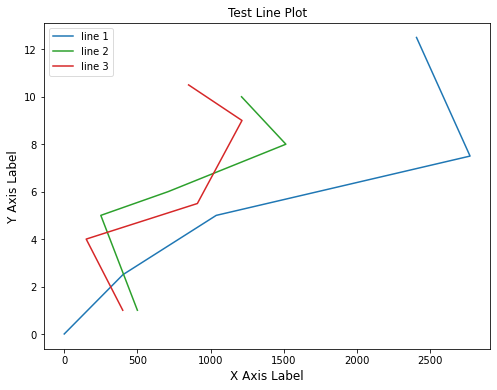

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from emcpy.plots.plots import LinePlot, VerticalLine,\
    Histogram, Scatter, HorizontalLine
from emcpy.plots.create_plots import CreatePlot


def _getLineData():
    # generate test data for line plots

    x1 = [0, 401, 1039, 2774, 2408]
    x2 = [500, 250, 710, 1515, 1212]
    x3 = [400, 150, 910, 1215, 850]
    y1 = [0, 2.5, 5, 7.5, 12.5]
    y2 = [1, 5, 6, 8, 10]
    y3 = [1, 4, 5.5, 9, 10.5]

    return x1, y1, x2, y2, x3, y3


def test_line_plot():
    # create line plot

    x1, y1, x2, y2, x3, y3 = _getLineData()
    lp1 = LinePlot(x1, y1)
    lp1.label = 'line 1'

    lp2 = LinePlot(x2, y2)
    lp2.color = 'tab:green'
    lp2.label = 'line 2'

    lp3 = LinePlot(x3, y3)
    lp3.color = 'tab:red'
    lp3.label = 'line 3'

    plt_list = [lp1, lp2, lp3]
    myplt = CreatePlot()
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Line Plot')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    myplt.add_legend()
    
test_line_plot()

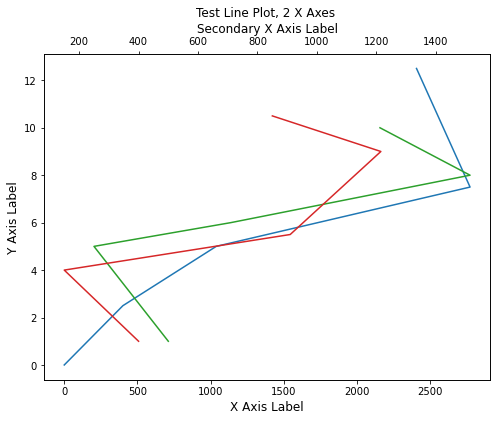

In [11]:
def test_line_plot_2_x_axes():
    # create line plot with two sets of axes
    # sharing a common y axis

    x1, y1, x2, y2, x3, y3 = _getLineData()
    lp1 = LinePlot(x1, y1)
    lp1.label = 'line 1'

    lp2 = LinePlot(x2, y2)
    lp2.color = 'tab:green'
    lp2.label = 'line 2'
    lp2.use_shared_ay()

    lp3 = LinePlot(x3, y3)
    lp3.color = 'tab:red'
    lp3.label = 'line 3'
    lp3.use_shared_ay()

    myplt = CreatePlot()
    plt_list = [lp1, lp2, lp3]
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Line Plot, 2 X Axes ')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    myplt.add_xlabel(xlabel='Secondary X Axis Label', xaxis='secondary')
    
test_line_plot_2_x_axes()

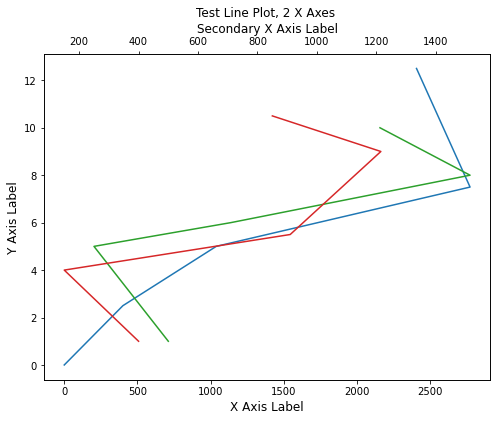

In [12]:
def test_line_plot_2_x_axes():
    # create line plot with two sets of axes
    # sharing a common y axis

    x1, y1, x2, y2, x3, y3 = _getLineData()
    lp1 = LinePlot(x1, y1)
    lp1.label = 'line 1'

    lp2 = LinePlot(x2, y2)
    lp2.color = 'tab:green'
    lp2.label = 'line 2'
    lp2.use_shared_ay()

    lp3 = LinePlot(x3, y3)
    lp3.color = 'tab:red'
    lp3.label = 'line 3'
    lp3.use_shared_ay()

    myplt = CreatePlot()
    plt_list = [lp1, lp2, lp3]
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Line Plot, 2 X Axes ')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    myplt.add_xlabel(xlabel='Secondary X Axis Label', xaxis='secondary')
    
test_line_plot_2_x_axes()

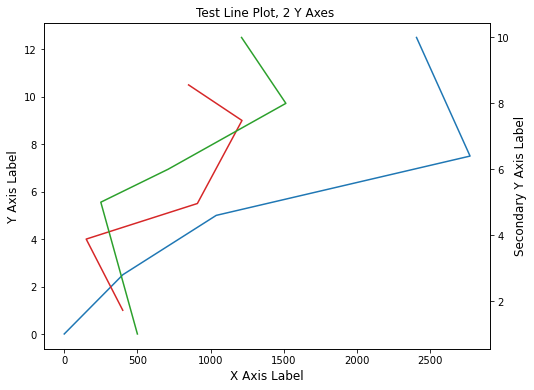

In [13]:
def test_line_plot_2_y_axes():
    # create line plot with two sets of axes
    # sharing a common x axis

    x1, y1, x2, y2, x3, y3 = _getLineData()

    lp1 = LinePlot(x1, y1)
    lp1.label = 'line 1'

    lp2 = LinePlot(x2, y2)
    lp2.color = 'tab:green'
    lp2.label = 'line 2'
    lp2.use_shared_ax()

    lp3 = LinePlot(x3, y3)
    lp3.color = 'tab:red'
    lp3.label = 'line 3'

    myplt = CreatePlot()
    plt_list = [lp1, lp2, lp3]
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Line Plot, 2 Y Axes ')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    myplt.add_ylabel(ylabel='Secondary Y Axis Label', yaxis='secondary')
    
test_line_plot_2_y_axes()

/scratch1/NCEPDEV/da/Kevin.Dougherty/emcpy/src/emcpy/plots/create_plots.py:538: UserWarning: FixedFormatter should only be used together with FixedLocator
  color=color, rotation=rotation)


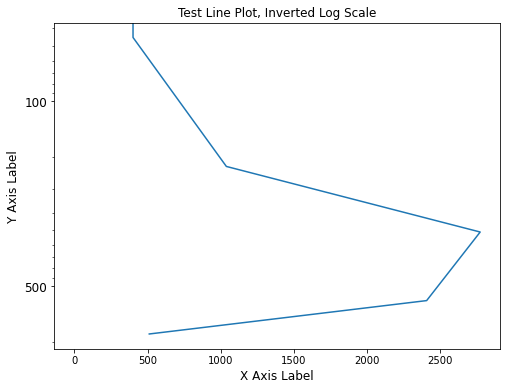

In [14]:
def test_line_plot_inverted_log_scale():
    # create a line plot with an inverted, log scale y axis

    x = [0, 401, 1039, 2774, 2408, 512]
    y = [0, 45, 225, 510, 1200, 1820]
    lp = LinePlot(x, y)
    plt_list = [lp]

    myplt = CreatePlot()
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Line Plot, Inverted Log Scale')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')

    myplt.set_yscale('log')
    myplt.invert_yaxis()

    ylabels = [0, 50, 100, 500, 1000, 2000]
    myplt.set_yticklabels(labels=ylabels)
    
test_line_plot_inverted_log_scale()

#### Histograms

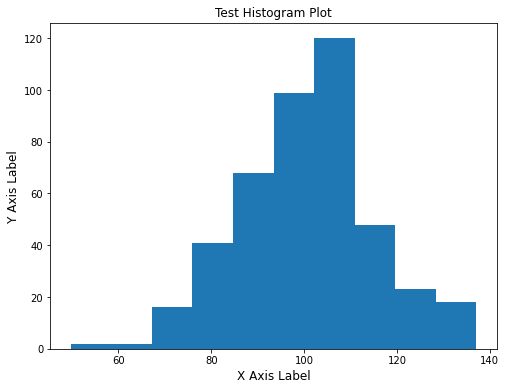

In [15]:
def _getHistData():
    # generate test data for histogram plots

    mu = 100  # mean of distribution
    sigma = 15  # standard deviation of distribution
    data1 = mu + sigma * np.random.randn(437)
    data2 = mu + sigma * np.random.randn(119)

    return data1, data2

def test_histogram_plot():
    # create histogram plot

    data1, data2 = _getHistData()
    hst1 = Histogram(data1)

    myplt = CreatePlot()
    plt_list = [hst1]
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Histogram Plot')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    
test_histogram_plot()

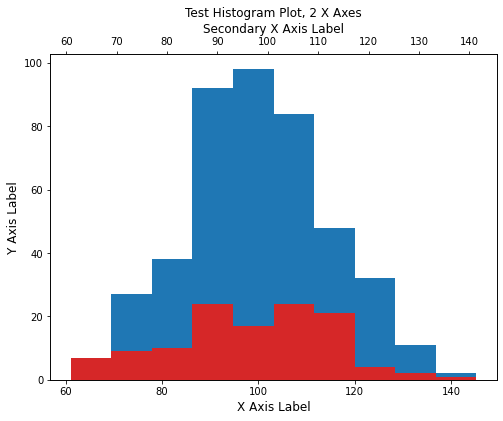

In [16]:
def test_histogram_plot_2_x_axes():
    # create histogram plot on two pair of axes with
    # a shared y axis

    data1, data2 = _getHistData()
    hst1 = Histogram(data1)
    hst2 = Histogram(data2)

    hst2.color = 'tab:red'
    hst2.use_shared_ay()

    myplt = CreatePlot()
    plt_list = [hst1, hst2]
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Histogram Plot, 2 X Axes')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    myplt.add_xlabel(xlabel='Secondary X Axis Label', xaxis='secondary')
    
test_histogram_plot_2_x_axes()

#### Scatter Plots

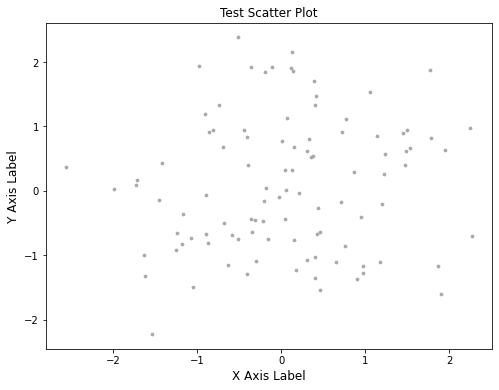

In [17]:
def _getScatterData():
    # generate test data for scatter plots

    rng = np.random.RandomState(0)
    x1 = rng.randn(100)
    y1 = rng.randn(100)

    rng = np.random.RandomState(0)
    x2 = rng.randn(30)
    y2 = rng.randn(30)

    return x1, y1, x2, y2


def test_scatter_plot():
    # create scatter plot

    x1, y1, x2, y2 = _getScatterData()
    sctr1 = Scatter(x1, y1)

    myplt = CreatePlot()
    plt_list = [sctr1]
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Scatter Plot')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    
test_scatter_plot()

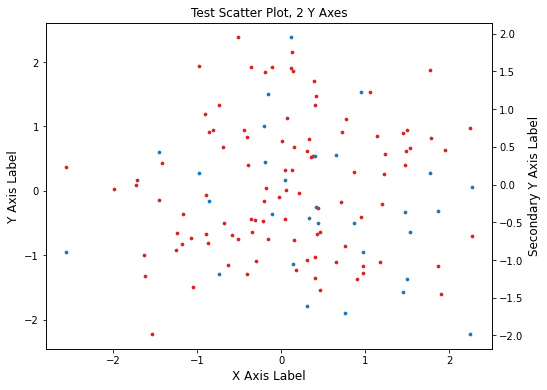

In [18]:
def test_scatter_plot_2_y_axes():
    # create scatter plot using two sets of axes
    # with a shared x axis

    x1, y1, x2, y2 = _getScatterData()
    sctr1 = Scatter(x1, y1)
    sctr1.color = 'tab:red'

    sctr2 = Scatter(x2, y2)
    sctr2.color = 'tab:blue'
    sctr2.use_shared_ax()

    myplt = CreatePlot()
    plt_list = [sctr1, sctr2]
    myplt.draw_data(plt_list)

    myplt.add_title(label='Test Scatter Plot, 2 Y Axes')
    myplt.add_xlabel(xlabel='X Axis Label')
    myplt.add_ylabel(ylabel='Y Axis Label')
    myplt.add_ylabel(ylabel='Secondary Y Axis Label', yaxis='secondary')
    
test_scatter_plot_2_y_axes()

### 5.) Map Plots

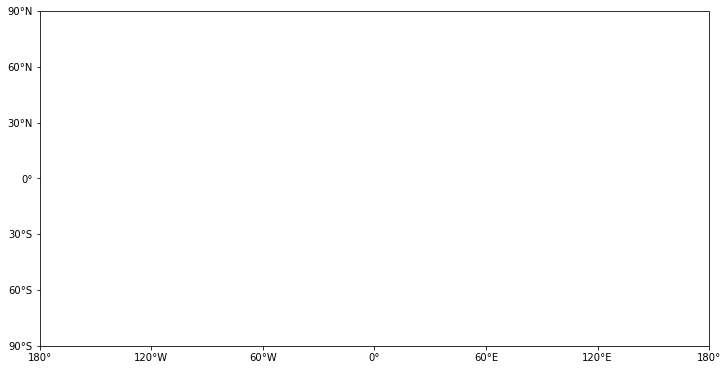

In [19]:
from emcpy.plots import CreateMap
from emcpy.plots.map_tools import Domain, MapProjection
from emcpy.plots.map_plots import MapScatter, MapGridded

def test_plot_global_map_no_features():
    # Create global map with no data using
    # PlateCarree projection and no coastlines
    mymap = CreateMap(figsize=(12, 8),
                      domain=Domain('global'),
                      proj_obj=MapProjection('plcarr'))
    
test_plot_global_map_no_features()

/scratch1/NCEPDEV/da/Kevin.Dougherty/anaconda3/envs/UFO/lib/python3.7/site-packages/shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


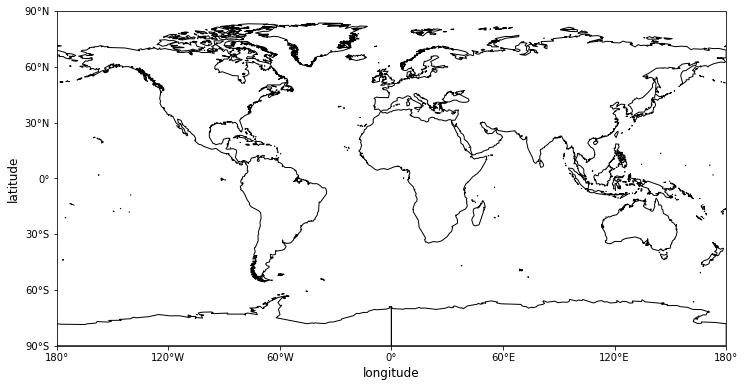

In [20]:
def test_plot_global_map_coastlines():
    # Create global map with no data using
    # PlateCarree projection and coastlines
    mymap = CreateMap(figsize=(12, 8),
                      domain=Domain('global'),
                      proj_obj=MapProjection('plcarr'))
    # Add coastlines
    mymap.add_features(['coastlines'])
    # Add x and y labels
    mymap.add_xlabel(xlabel='longitude')
    mymap.add_ylabel(ylabel='latitude')
    
test_plot_global_map_coastlines()

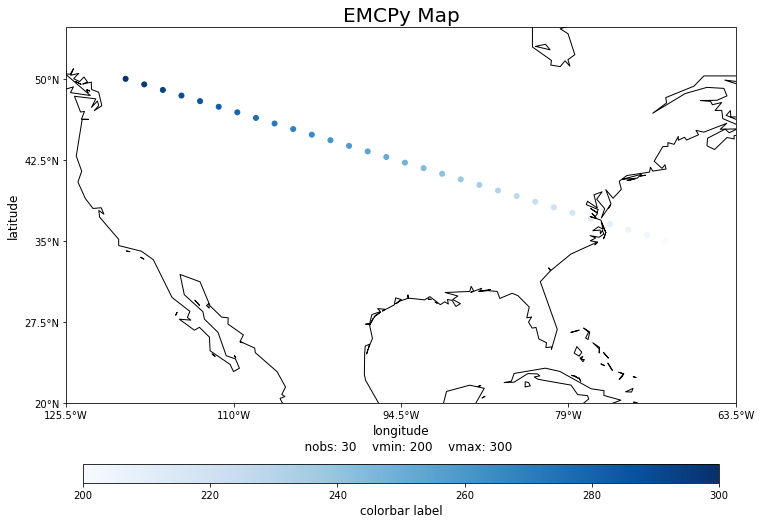

In [21]:
def test_plot_map_scatter_conus():
    # Create scatter plot on CONUS domian
    mymap = CreateMap(figsize=(12, 8),
                      domain=Domain('conus'),
                      proj_obj=MapProjection('plcarr'))
    # Add coastlines
    mymap.add_features(['coastlines'])

    # generate a diagonal line across the US
    scatterobj = MapScatter(latitude=np.linspace(35, 50, 30),
                            longitude=np.linspace(-70, -120, 30),
                            data=np.linspace(200, 300, 30))
    # change colormap and markersize
    scatterobj.cmap = 'Blues'
    scatterobj.markersize = 25

    # Draw data onto map
    mymap.draw_data([scatterobj])

    # Add plot features
    mymap.add_colorbar(label='colorbar label',
                       label_fontsize=12, extend='neither')
    mymap.add_title(label='EMCPy Map', loc='center',
                    fontsize=20)
    mymap.add_xlabel(xlabel='longitude')
    mymap.add_ylabel(ylabel='latitude')

    # annotate some stats
    stats_dict = {
        'nobs': len(np.linspace(200, 300, 30)),
        'vmin': 200,
        'vmax': 300,
    }
    mymap.add_stats_dict(stats_dict=stats_dict)
    
test_plot_map_scatter_conus()

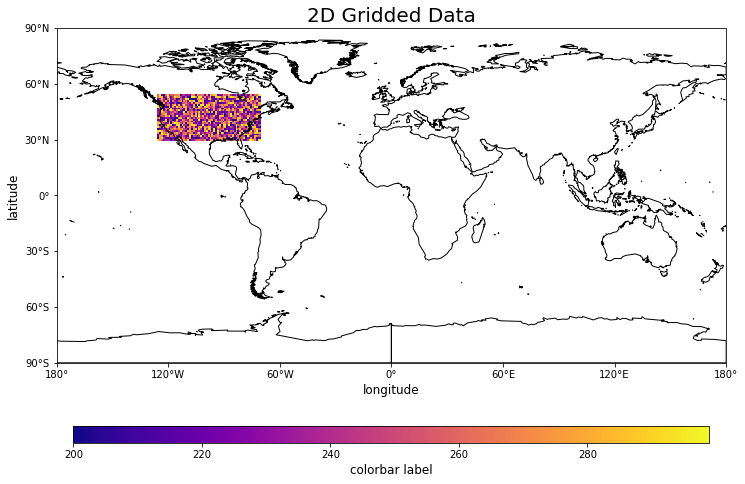

In [22]:
def test_plot_map_gridded_global():
    # Create 2d gridded plot on global domian
    mymap = CreateMap(figsize=(12, 8),
                      domain=Domain('global'),
                      proj_obj=MapProjection('plcarr'))
    mymap.add_features(['coastlines'])

    # Create random gridded data
    lat, lon = np.mgrid[30:55:1, 235:290:1]
    data = np.random.randint(low=200, high=300, size=(25, 55))

    griddedobj = MapGridded(lat, lon, data)
    griddedobj.cmap = 'plasma'

    # Draw data onto map
    mymap.draw_data([griddedobj])

    # Add plot features
    mymap.add_colorbar(label='colorbar label',
                       label_fontsize=12, extend='neither')
    mymap.add_title(label='2D Gridded Data', fontsize=20)
    mymap.add_xlabel(xlabel='longitude')
    mymap.add_ylabel(ylabel='latitude')
    
test_plot_map_gridded_global()

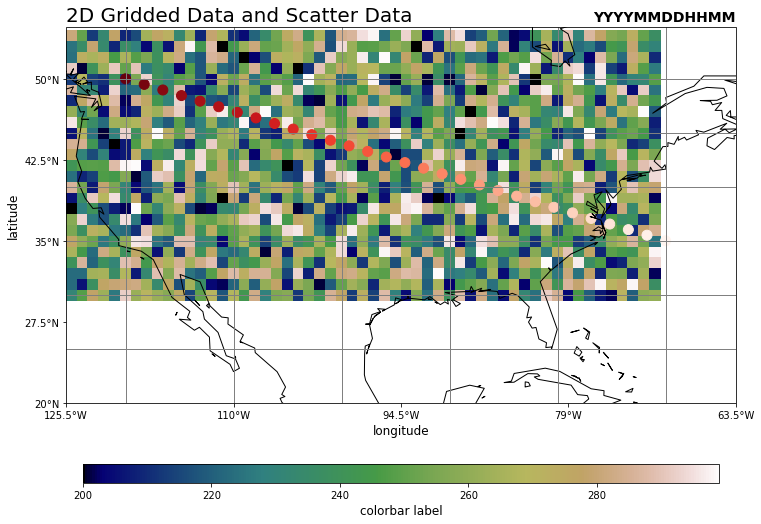

In [23]:
def test_plot_map_multidata_conus():
    # Plot scatter and gridded data on CONUS domain
    mymap = CreateMap(figsize=(12, 8),
                      domain=Domain('conus'),
                      proj_obj=MapProjection('plcarr'))
    mymap.add_features(['coastlines'])

    # Create random gridded data
    lat, lon = np.mgrid[30:55:1, 235:290:1]
    data = np.random.randint(low=200, high=300, size=(25, 55))

    griddedobj = MapGridded(lat, lon, data)
    griddedobj.cmap = 'gist_earth'

    # generate a diagonal line across the US
    scatterobj = MapScatter(latitude=np.linspace(35, 50, 30),
                            longitude=np.linspace(-70, -120, 30),
                            data=np.linspace(200, 300, 30))
    # change colormap and markersize
    scatterobj.cmap = 'Reds'
    scatterobj.markersize = 100
    # set colorbar=False so the gridded data is on colorbar
    scatterobj.colorbar = False

    # Draw data onto map in layered order
    mymap.draw_data([griddedobj, scatterobj])

    # Add plot features
    mymap.add_colorbar(label='colorbar label',
                       label_fontsize=12, extend='neither')
    mymap.add_title(label='2D Gridded Data and Scatter Data',
                    loc='left', fontsize=20)
    mymap.add_title(label='YYYYMMDDHHMM',
                    loc='right', fontsize=14,
                    fontweight='semibold')
    mymap.add_xlabel(xlabel='longitude')
    mymap.add_ylabel(ylabel='latitude')
    mymap.add_grid()
    
test_plot_map_multidata_conus()